### Preparing for submission to Kaggle Competition: https://www.kaggle.com/competitions/nlp-getting-started/data

We have to predict whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0. Binary classification NLP problem. 

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string

In [161]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [162]:
train_data.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [163]:
train_data = train_data.rename(columns={'text': 'Text', 'id': 'Id', 'target': 'Target'})
test_data = test_data.rename(columns={'text': 'Text', 'id': 'Id', 'target': 'Target'})

In [164]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   Text      7613 non-null   object
 4   Target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [165]:
#Removing two columns with missing values 
train_data = train_data.drop(columns=['keyword', 'location'])
train_data.head()

,Id,Text,Target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [166]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [167]:
#Function to remove Punctuation
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    # It will discard all punctuations
    return text_nopunct

train_data['Text'] = train_data['Text'].apply(lambda x: remove_punct(x))
train_data.head()

,Id,Text,Target
0,1,Our Deeds are the Reason of this earthquake Ma...,1
1,4,Forest fire near La Ronge Sask Canada,1
2,5,All residents asked to shelter in place are be...,1
3,6,13000 people receive wildfires evacuation orde...,1
4,7,Just got sent this photo from Ruby Alaska as s...,1


In [168]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
# Stemming maps different forms of the same word to a common “stem” - for example, the English stemmer maps connection, connections, connective, connected, and connecting to connect. 
# So a searching for connected would also find documents which only have the other forms.
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')
stop = stopwords.words('english')
# "   ".join(stop)

[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i   me   my   myself   we   our   ours   ourselves   you   you're   you've   you'll   you'd   your   yours   yourself   yourselves   he   him   his   himself   she   she's   her   hers   herself   it   it's   its   itself   they   them   their   theirs   themselves   what   which   who   whom   this   that   that'll   these   those   am   is   are   was   were   be   been   being   have   has   had   having   do   does   did   doing   a   an   the   and   but   if   or   because   as   until   while   of   at   by   for   with   about   against   between   into   through   during   before   after   above   below   to   from   up   down   in   out   on   off   over   under   again   further   then   once   here   there   when   where   why   how   all   any   both   each   few   more   most   other   some   such   no   nor   not   only   own   same   so   than   too   very   s   t   can   will   just   don   don't   should   should've   now   d   ll   m   o   re   ve   y   ain   aren  

In [169]:
train_data['Text'] = train_data['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
train_data.head()

,Id,Text,Target
0,1,Our Deeds Reason earthquake May ALLAH Forgive us,1
1,4,Forest fire near La Ronge Sask Canada,1
2,5,All residents asked shelter place notified off...,1
3,6,13000 people receive wildfires evacuation orde...,1
4,7,Just got sent photo Ruby Alaska smoke wildfire...,1


0    4342
1    3271
Name: Target, dtype: int64


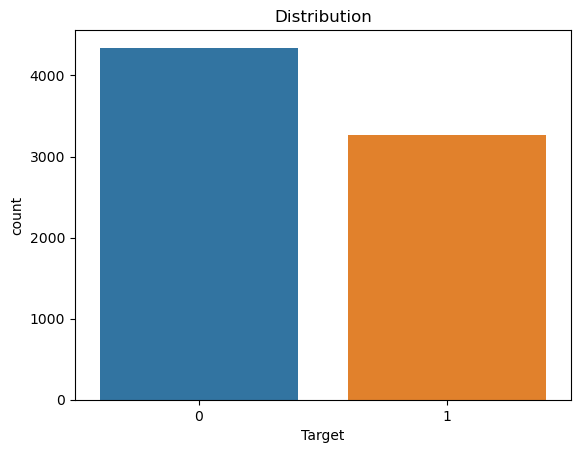

In [170]:
sns.countplot(x='Target', data=train_data)
plt.title('Distribution');

print(train_data['Target'].value_counts())

In [171]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data['Text'])
y_train = train_data['Target']
X_test = vectorizer.transform(test_data['Text'])

### Now we train the model using some well-known algorithms 

In [172]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Splitting train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Train logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_val = lr_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print('Validation score (LR):', val_accuracy)


Validation score (LR): 0.7977675640183848


## Try KNN

In [173]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

test_sc = []
train_sc = [] 
neighbors = []

for i in range (5, 30):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    neighbors.append(i)
    test_sc.append(knn_model.score(X_val, y_val))
    train_sc.append(knn_model.score(X_train, y_train))

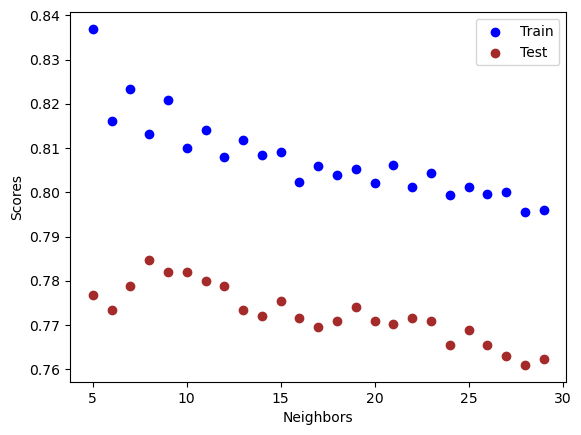

In [174]:
import matplotlib.pyplot as plt
plt.scatter(neighbors, train_sc, c = 'blue', label='Train')
plt.scatter(neighbors, test_sc, c = 'brown', label='Test')
plt.xlabel('Neighbors')
plt.ylabel('Scores')
plt.legend()
plt.show()

#### We will check Naive Bayes and Bagging Decision Tree as well. 

In [175]:
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()
naive_model.fit(X_train.toarray(), y_train)

y_pred_val = naive_model.predict(X_val.toarray())
val_accuracy = accuracy_score(y_val, y_pred_val)
print('Validation score (NB):', val_accuracy)

Validation score (NB): 0.6283650689428759


### Lastly, decision tree

In [176]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bg_model = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=20)
bg_model.fit(X_train, y_train)
y_pred_val = bg_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print('Validation score (BG):', val_accuracy)

Validation score (BG): 0.7603414313854235


### Best among these seems like SV

In [177]:
#from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_val = svm_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print('Validation score (NB):', val_accuracy)

Validation score (NB): 0.793827971109652


In [178]:
y_test = svm_model.predict(X_test)

In [179]:
submission = pd.DataFrame({'Id': test_data['Id'], 'Target': y_test})
submission.to_csv('submission.csv', index=False)